### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 16th at 11.59pm CDT
---

The first two homework problems this week are very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

## Solution

1. Equation that describes output of this network:

$o_k = g(\sum_{j=1}^M w_{jk}a_j + b_k)$

where $a_j = f(\sum_{i=1}^N w_{ij}x_i + b_j)$

The model uses a linear activation of form $a_j=f(x)=x$. There is also only 1 synapse connecting the neuron to the output, which means only 1 weight $w$. So there is no need for the sum. The final form becomes:

$o = g(wx + b) = wx + b$

This is a linear equation, so I don't think the model can learn any nonlinearities. I ran the network on the given dataset several times, and as expected, it does not do a good job of classifying the data.

2. After increasing the neurons to 2 and switching to a nonlinear activation (I used ReLU), I see that the model is indeed capable of learning nonlinearities. It does a better job of identifying some of the clusters, but it does not do a good enough job of classifying the data. I also noticed that reruning the same model on the dataset doesn't always give the same thing (it doesn't identify clusters in the same way). For instance, sometimes it roughly identifies 2 of the 4 clusters, and other times it correctly classifies most of the blue and orange data points, but not as 4 distinct clusters. 


3. After increasing the number of neurons to 3 and using ReLU nonlinear activation, the model actually does a much better job of classifying the dataset –– it roughly identifies the 4 clusters during most runs. But as observed in (2), the classification isn't consistent from run to run, and there were times when it successfully identified only 2 clusters.


4. After experimenting for a while, the smallest configuration I could use was 3 hidden layers with (4,3,3) neurons. I also found it better to leave the learning rate, regularization, and other settings unchanged from the previous problems. This model gave me a test loss of 0.167.


5. Increasing the model size to (3,3,2) did not improve the fit any more than the architecture used in (3). I ran it several times and it often took slightly longer to converge to a good model. However, it did converge pretty consistently during each run––it roughly identified 4 clusters each time, but not as well as it could've if I had known the optimal number of layers, neurons per layer, etc (Lecture 21). 

## Problem 2


[This](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.01&noise=50&networkShape=3,2&seed=0.65406&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature combinations may be hard to construct.

1. Train the best model you can, using just X1 and X2. Add or remove layers and neurons as you see fit, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?


2. Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

## Solution

1. The best model I could train used 3 hidden layers, with (4,4,4) neurons, 0.01 learning rate, 0.01 regularization rate, and batch size 10. The best test loss I can get is around 0.500. The output surface –– the orange and blue in the background –– looks pretty smooth, but the model doesn't really do a good job of identifying clusters. Using just the X1 & X2 features for the model makes it very difficult to get a good model for this dataset.


2. When adding sin(X1) and sin(X2), the output surface does try to grab some of the points in the spiral after running for some time. The model output surface is not smoother––it actually looks jagged, like it's almost trying to overfit the data.
When adding $X_1X_2$ and $sin(X_2)$ instead, the model actually does a much better job of grabbing the points in the spiral. The output surface isn't perfectly smooth, but I definitely see some spirals.

## Problem 3

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

## Solution

In [59]:
import numpy as np
from matplotlib import pyplot as plt

In [60]:
# 1) 

# Read in SDSS galaxy color data
data = np.load("../../homeworks/hw_data/hw8_data_1.npy")

# Slice the data array to only take every other 10th row
data = data[np.arange(0,len(data),10)]

# create arrays of (𝑢−𝑔), (𝑔−𝑟), (𝑟−𝑖), and (𝑖−𝑧) colors
u_g = data['u']-data['g']
g_r = data['g']-data['r']
r_i = data['r']-data['i']
i_z = data['i']-data['z']
# create arrays of redshift and the spectral class
redshift = data['redshift']
spec_class = data['specClass']

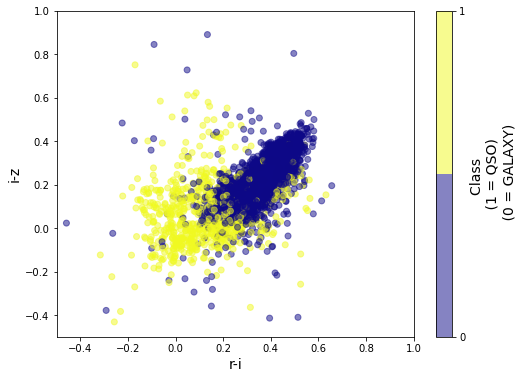

In [62]:
# 2) 

# Define labels for color coding galaxy & quasar class
labels = np.full(len(spec_class), 0)
idx1, idx2 = np.where(spec_class=='QSO')[0], np.where(spec_class=='GALAXY')[0]
labels[idx1] = 1
labels[idx2] = 0

# Make a scatter plot of (r−i) versus (i−z)
fig, ax = plt.subplots(figsize=(8,6))

im = ax.scatter(r_i,i_z, c=labels, cmap=plt.cm.get_cmap('plasma', 2), alpha=0.5)
ax.set_xlabel('r-i',fontsize=14); ax.set_ylabel('i-z',fontsize=14)
ax.set_xlim(-0.5,1); ax.set_ylim(-0.5,1)
cbar = fig.colorbar(im,ticks=[0, 1])
cbar.set_label('Class \n (1 = QSO) \n (0 = GALAXY)', rotation=90, fontsize=14) 
plt.show()

In [65]:
# 3) 

from sklearn.model_selection import train_test_split

# Stack the  (𝑟−𝑖)  and  (𝑖−𝑧)  colors into a data matrix
X = np.array([r_i, i_z,]).T
np.shape(X)

# label array was created in problem (2). Define that as 'y' here.
y = labels

# perform a train-test split, taking  20%  of the data for testing
# Set the random_state in your train-test split to be 42 for reproducibility
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=20/100, random_state=42)

In [71]:
# 4) 

# Scale your training and testing data to prepare it for the DNN.

from sklearn import preprocessing

Xtrain_scaled = preprocessing.scale(Xtrain)
Xtest_scaled = preprocessing.scale(Xtest)

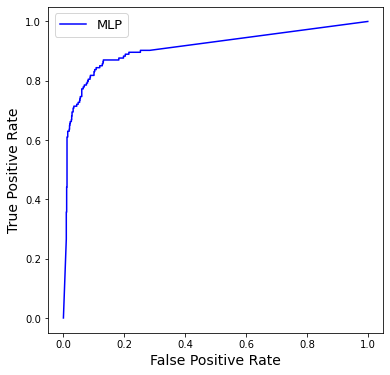

In [67]:
# 5) 

# Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, 
# two hidden layers of respective sizes of 5 and 2, and using max_iter=1000, and random_state=42. 

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve

clf = MLPClassifier(solver='sgd', activation='relu', hidden_layer_sizes=(5,2), random_state=42, max_iter=1000)
clf.fit(Xtrain_scaled, ytrain)

# plot an ROC curve that shows the network's performance on the scaled testing data.
y_prob = clf.predict_proba(Xtest_scaled)
fpr, tpr, thresh = roc_curve(ytest, y_prob[:,1])

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, c='b', label='MLP')
ax.set_xlabel('False Positive Rate',fontsize=14); ax.set_ylabel('True Positive Rate',fontsize=14)
plt.legend(fontsize=13)
plt.show()

6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.

In [68]:
# 6) 

# Optimize the hyperparameters of the network. 

from sklearn.model_selection import GridSearchCV

# You will use GridSearchCV with the following hyperparameters for the network

parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}


grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1) # n_jobs=-1 utilizes all availables cores on machine
grid.fit(Xtrain_scaled, ytrain)

# Print out the classification score for the training data, and the best parameters obtained by the cross validation
print(grid.best_score_) # Mean cross-validated score of the best_estimator
print(grid.best_params_)

0.9355
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}


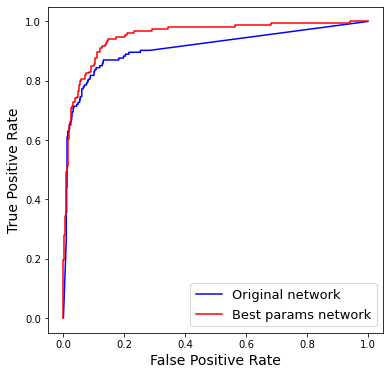

In [70]:
# 7) 

# Fit a new DNN using the best hyperparameters obtained in (6).

clf2 = MLPClassifier(solver='adam', activation='tanh', hidden_layer_sizes=(5,5), random_state=42, max_iter=1000)
clf2.fit(Xtrain_scaled, ytrain)

# plot ROC curves for this new network and the original network. 
# Let the x and y axes have the full limit range of 0 to 1.
y_prob2 = clf2.predict_proba(Xtest_scaled)
fpr2, tpr2, thresh2 = roc_curve(ytest, y_prob2[:,1])

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, c='b',label='Original network')
ax.plot(fpr2, tpr2,c='r',label='Best params network')
ax.set_xlabel('False Positive Rate',fontsize=14); ax.set_ylabel('True Positive Rate',fontsize=14)
plt.legend(fontsize=13)
plt.show()

Clearly, using the best parameters produces a better ROC plot (higher TPR at low FPR).